In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-07-26 16:12:56.722904: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753546376.917865      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753546376.973233      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir = "/kaggle/input/cat-and-dog/cats_dogs_light/cats_dogs_light/train"
test_dir = "/kaggle/input/cat-and-dog/cats_dogs_light/cats_dogs_light/test"

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2
)


In [4]:
batch_size = 32
img_size = (128, 128)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 800 images belonging to 2 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 200 images belonging to 2 classes.


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*img_size, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753546403.802623      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1753546412.789445     109 service.cc:148] XLA service 0x78e770006960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753546412.790165     109 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1753546413.156849     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/25 ━━━━━━━━━━━━━━━━━━━━ 2:14 6s/step - accuracy: 0.5625 - loss: 0.6864

I0000 00:00:1753546415.959597     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 281ms/step - accuracy: 0.5654 - loss: 0.6944 - val_accuracy: 0.5450 - val_loss: 0.6862
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5539 - loss: 0.6849 - val_accuracy: 0.5450 - val_loss: 0.6788
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5700 - loss: 0.6752 - val_accuracy: 0.5550 - val_loss: 0.6743
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5495 - loss: 0.6784 - val_accuracy: 0.5500 - val_loss: 0.6618
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5686 - loss: 0.6606 - val_accuracy: 0.5900 - val_loss: 0.6508
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6021 - loss: 0.6551 - val_accuracy: 0.6200 - val_loss: 0.6624
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5963 - loss: 0.6615 - val_accuracy: 0.6650 - val_loss: 0.6413
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.6404 - loss: 0.6304 - val_accuracy: 0.6450 - val_loss: 

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Found 400 images belonging to 2 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.6248 - loss: 0.6560
Test Accuracy: 69.00%


In [11]:
import numpy as np

# Get the predicted probabilities
predictions = model.predict(test_generator)
# Since this is binary classification, threshold at 0.5:
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Get filenames to match each prediction
filenames = test_generator.filenames

# Mapping class indices to readable labels (check if 0=cat, 1=dog in your data)
class_indices = test_generator.class_indices
label_map = {v: k for k, v in class_indices.items()}

# Show predictions for each image
for fname, pred in zip(filenames, predicted_classes):
    print(f"{fname}: {label_map[pred]}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
cat/cat.9818.jpg: dog
cat/cat.9819.jpg: dog
cat/cat.9820.jpg: cat
cat/cat.9821.jpg: dog
cat/cat.9822.jpg: dog
cat/cat.9823.jpg: dog
cat/cat.9824.jpg: cat
cat/cat.9825.jpg: cat
cat/cat.9826.jpg: cat
cat/cat.9827.jpg: dog
cat/cat.9828.jpg: cat
cat/cat.9829.jpg: cat
cat/cat.983.jpg: cat
cat/cat.9830.jpg: dog
cat/cat.9831.jpg: dog
cat/cat.9832.jpg: dog
cat/cat.9833.jpg: cat
cat/cat.9834.jpg: cat
cat/cat.9835.jpg: cat
cat/cat.9836.jpg: dog
cat/cat.9837.jpg: cat
cat/cat.9838.jpg: cat
cat/cat.9839.jpg: cat
cat/cat.984.jpg: dog
cat/cat.9840.jpg: dog
cat/cat.9841.jpg: cat
cat/cat.9842.jpg: cat
cat/cat.9843.jpg: dog
cat/cat.9844.jpg: dog
cat/cat.9845.jpg: dog
cat/cat.9846.jpg: cat
cat/cat.9847.jpg: dog
cat/cat.9848.jpg: cat
cat/cat.9849.jpg: dog
cat/cat.985.jpg: dog
cat/cat.9850.jpg: cat
cat/cat.9851.jpg: cat
cat/cat.9852.jpg: cat
cat/cat.9853.jpg: dog
cat/cat.9854.jpg: dog
cat/cat.9855.jpg: cat
cat/cat.9856.jpg: cat
cat/cat.9857.jpg: cat
cat/cat.9858.jpg:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


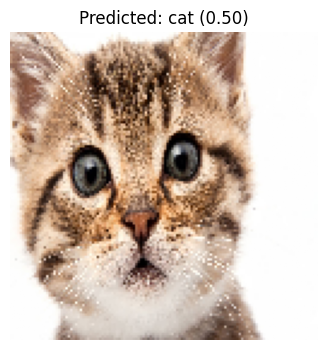

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/kaggle/input/test-img/cat.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0

input_img = np.expand_dims(img_array, axis=0)

pred_prob = model.predict(input_img)[0][0]
predicted_label = 'dog' if pred_prob > 0.5 else 'cat'

plt.figure(figsize=(4, 4))
plt.imshow(img_array)
plt.title(f"Predicted: {predicted_label} ({pred_prob:.2f})")
plt.axis('off')
plt.show()


In [14]:
model.save('dog_cat_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


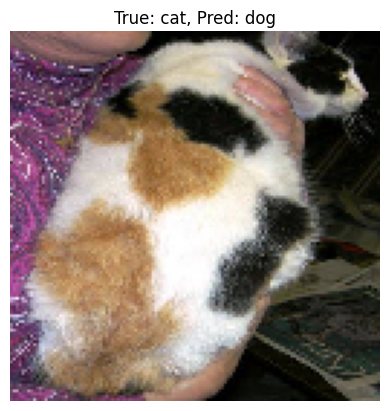

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


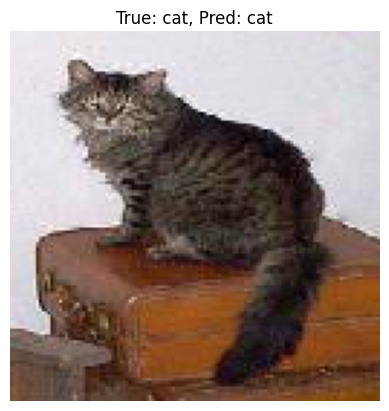

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


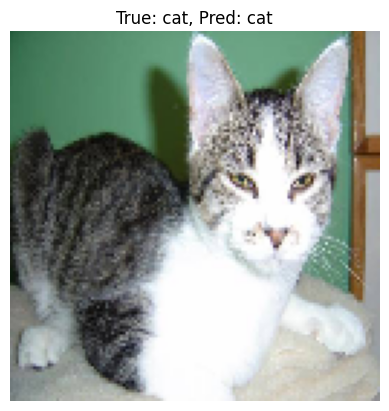

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


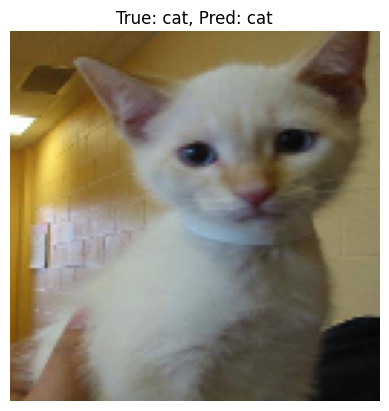

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


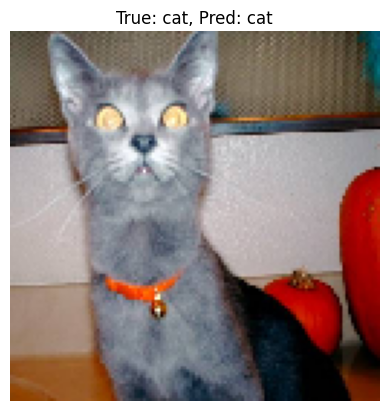

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


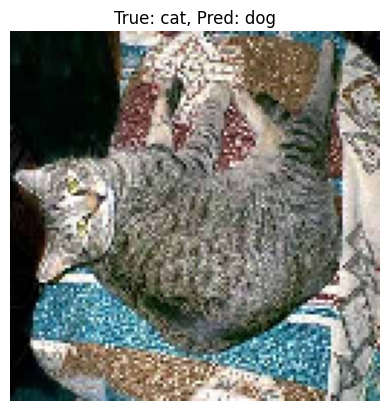

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


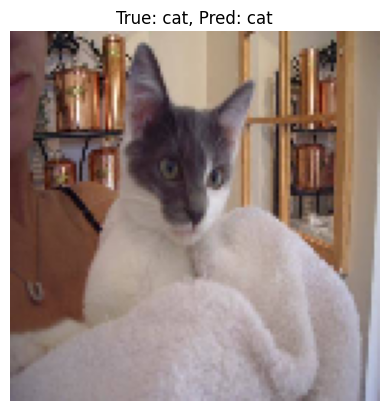

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


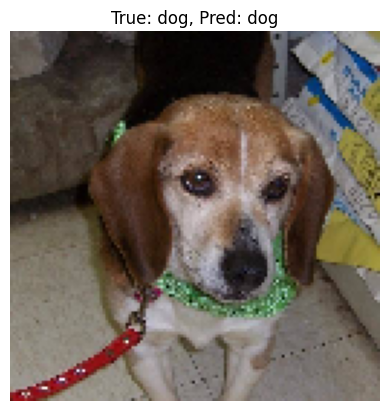

In [ ]:
import matplotlib.pyplot as plt

for i in range(8):
    image_batch, label_batch = next(test_generator)
    img = image_batch[0]
    true_label = 'dog' if label_batch[0] == 1 else 'cat'
    pred_prob = model.predict(img[np.newaxis, ...])[0][0]
    pred_label = 'dog' if pred_prob > 0.5 else 'cat'
    plt.imshow(img)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
    plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


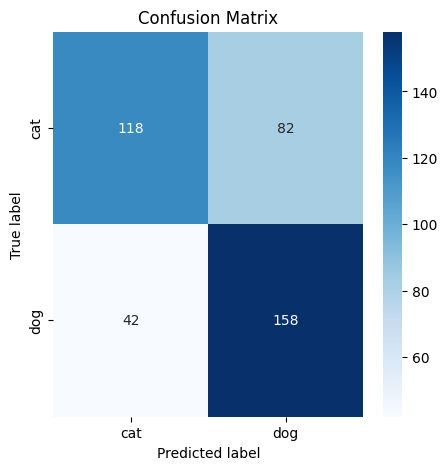

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()

true_classes = test_generator.classes

cm = confusion_matrix(true_classes, predicted_classes)

class_indices = test_generator.class_indices
labels = list(class_indices.keys())
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
